# Product Recommendation Systems

### Domain - E-commerce 

### Context :

Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations are so essential that customers now expect to see similar features on all other e-commerce sites.

### Data Description -
Data columns-  First three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.


#### Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has several datasets. For this case study, we are using the Electronics dataset

In [1]:
#Recommendation Systems

In [2]:
#Recommender systems aim to predict users’ interests and recommend product items that quite likely are interesting for them.

#Recommendation system will help businesses improve their shopper's,user experience or on website,youtub,amazon and result in better customer acquisition and retention.

In [3]:
#Types of recommendation system

In [4]:
#There are majorly six types of recommender systems which work primarily in the Media and Entertainment industry::

#1. Popularity based recommendation system
#2. Content-based recommendation system
#3. Collaborative recommendation system
#4. Matrix factorization recommendation system
#5. Association Rule
#6. Hybrid-recommendation system

In [5]:
#Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#1. Popularity based recommendation system

In [8]:
#This model is not actually personalized - it simply recommends to a user the most popular items that the user has not previously consumed 
#i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

In [9]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 3\\Sem_Preparation\\ratings_Electronics.csv')
df.head()

,userId,productId,ratings,timestamp,genre1,genre2,genre3
0,A2CX7LUOHB2NDG,321732944,5,1341100800,freezers,dishwashers,video game consoles
1,A2NWSAGRHCP8N5,439886341,1,1367193600,still cameras,freezers,home electronics
2,A2WNBOD3WNDNKT,439886341,3,1374451200,CD,computers,coffee grinders
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,dough blenders,induction cookers,answering machines
4,A1QGNMC6O1VW39,511189877,5,1397433600,HiFi,induction cookers,electric kettles


In [10]:
df.shape

(1048575, 7)

In [11]:
df=df.sample(2000)

In [12]:
df1=df.drop('timestamp',axis=1)
df1.head()

,userId,productId,ratings,genre1,genre2,genre3
656548,A2C27RKPEMJ29J,B00097CUIE,5,waffle irons,exhaust hoods,water heaters
505738,A2D0O0M2L67ZMR,B0002SQ2P2,5,electric mixers,camcorders,air conditioners
66360,A2NBV5BCYQWNNZ,B00004Z5M1,4,induction cookers,"clocks, alarm clocks",herb grinders
420045,A34LA8EKXE9JXA,B00021MX3E,5,electric kettles,clothes dryers,washing machines
368541,A2SPQFPOVGF2P3,B00016V3VI,5,trash compactors,DVD players,coffee grinders


In [13]:
df1.isnull().sum()

userId       0
productId    0
ratings      0
genre1       0
genre2       0
genre3       0
dtype: int64

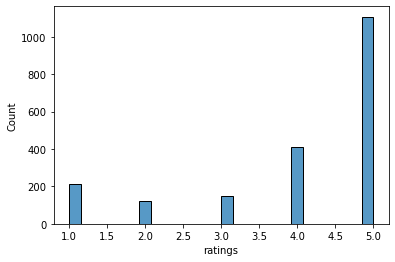

In [14]:
sns.histplot(df1['ratings'])
plt.show()

In [15]:
 #Check the top 10 users based on ratings

In [16]:
data1=df1.groupby('userId')['ratings'].agg('count').sort_values(ascending=False)
data1.head(10)

userId
AA797LFUG2ZGS            2
A1IG1I6MR3HAWA           2
A07313811DMS8UJYE7X67    1
A3J8P2MVDW60LM           1
A3K3P4SKG4Q1KB           1
A3K1I6YCZ4IFQJ           1
A3JVCAQ7Z1OWDN           1
A3JUJRN2J800KC           1
A3JSZD07PG38I8           1
A3JL1QTGHD12JC           1
Name: ratings, dtype: int64

In [24]:
#2. Content Based Recommendation.

In [25]:
#This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. 
#In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present).
#In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended..

In [26]:
df1.head()

,userId,productId,ratings,genre1,genre2,genre3
656548,A2C27RKPEMJ29J,B00097CUIE,5,waffle irons,exhaust hoods,water heaters
505738,A2D0O0M2L67ZMR,B0002SQ2P2,5,electric mixers,camcorders,air conditioners
66360,A2NBV5BCYQWNNZ,B00004Z5M1,4,induction cookers,"clocks, alarm clocks",herb grinders
420045,A34LA8EKXE9JXA,B00021MX3E,5,electric kettles,clothes dryers,washing machines
368541,A2SPQFPOVGF2P3,B00016V3VI,5,trash compactors,DVD players,coffee grinders


In [29]:
data2=df1[['genre1','genre2','genre3']]
data2.head()

,genre1,genre2,genre3
656548,waffle irons,exhaust hoods,water heaters
505738,electric mixers,camcorders,air conditioners
66360,induction cookers,"clocks, alarm clocks",herb grinders
420045,electric kettles,clothes dryers,washing machines
368541,trash compactors,DVD players,coffee grinders


In [30]:
data2=pd.get_dummies(data2)
data2.head()

,genre1_CD,genre1_DVD players,genre1_HiFi,genre1_TV sets,genre1_air conditioners,genre1_answering machines,genre1_blenders,genre1_camcorders,"genre1_clocks, alarm clocks",genre1_clothes dryers,...,genre3_refrigerators,genre3_rice cookers,genre3_still cameras,genre3_telephones,genre3_toasters,genre3_trash compactors,genre3_video game consoles,genre3_waffle irons,genre3_washing machines,genre3_water heaters
656548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
505738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
368541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.neighbors import NearestNeighbors

In [32]:
rc_model=NearestNeighbors(metric='cosine')
rc_model.fit(data2)

NearestNeighbors(metric='cosine')

In [33]:
#recommendation for user id 986754

In [34]:
data2.iloc[2,:]#rows values for the user id 986754

genre1_CD                     0
genre1_DVD players            0
genre1_HiFi                   0
genre1_TV sets                0
genre1_air conditioners       0
                             ..
genre3_trash compactors       0
genre3_video game consoles    0
genre3_waffle irons           0
genre3_washing machines       0
genre3_water heaters          0
Name: 66360, Length: 126, dtype: uint8

In [35]:
#data2.iloc[2,:].values.reshape(1,-1)

In [54]:
dis1,ind1=rc_model.kneighbors(X=data2.iloc[2,:].values.reshape(1,-1),n_neighbors=15)

In [55]:
dis1

array([[0.        , 0.        , 0.33333333, 0.33333333, 0.33333333,
        0.33333333, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667]])

In [56]:
ind1

array([[   2,  213,  514,  487, 1766, 1341, 1769, 1322, 1562,  121, 1767,
         937, 1880, 1872, 1327]], dtype=int64)

In [57]:
data2.index[ind1[0]]

Int64Index([ 986754,  878615,  270304, 1017981,  235985,  732639,  559836,
             789220,  135024,  223773,  842773,  438498,  280142,  222809,
             395756],
           dtype='int64')

In [59]:
data2.iloc[514,:]#recomendated generes

genre1_CD                     0
genre1_DVD players            1
genre1_HiFi                   0
genre1_TV sets                0
genre1_air conditioners       0
                             ..
genre3_trash compactors       0
genre3_video game consoles    0
genre3_waffle irons           0
genre3_washing machines       0
genre3_water heaters          0
Name: 270304, Length: 126, dtype: uint8

In [ ]:
#-----------------------------------------------------END----------------------------------------------------#